# **Telecom X – Parte 2: Prevendo Churn**

🎯 **Missão e Objetivos**

O objetivo deste projeto é desenvolver modelos preditivos capazes de identificar com antecedência, quais clientes possuem maior probabilidade de cancelar seus serviços com a empresa Telecom X.

Para isso, será construído um pipeline robusto de modelagem que contempla as seguintes etapas:

- **Preparação dos dados**, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e normalização.

- **Análise de correlação** entre variáveis e **seleção de atributos relevantes**.

- **Treinamento de múltiplos modelos de classificação** para comparação de desempenho.

- **Avaliação das métricas de performance** (como precisão, recall, F1-score, entre outras).

- **Interpretação dos resultados**, com destaque para a importância de cada variável no processo de previsão.

- **Elaboração de uma conclusão estratégica**, indicando os principais fatores que contribuem para a evasão de clientes.

O objetivo final é fornecer à empresa uma base analítica sólida que permita a adoção de medidas proativas de retenção de clientes.

# Preparar os Dados

In [130]:
# importar a biblioteca pandas
import pandas as pd

In [131]:
# ler e analisar o dataset
url = '/content/dados_tratados.csv'
dados = pd.read_csv(url)

dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [132]:
# visualizar as informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   objec

# Remover colunas irrelevantes

In [133]:
# remover a coluna de identificação de cliente "customerID"
dados = dados.drop(['customerID'], axis=1)

# Transformar variáveis categóricas usando o método get_dummies (encoding)

In [134]:
# criar cópia de segurança do DataFrame, como garantia
dados_encoded = dados.copy()

In [135]:
# selecionar colunas categóricas
colunas_categoricas = dados_encoded.select_dtypes(include=['object']).columns.tolist()

In [136]:
# visualizar colunas categóricas
colunas_categoricas

['customer_gender',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaymentMethod']

In [137]:
# visualizar os valores das colunas categóricas
for col in colunas_categoricas:
    print(f"Valores únicos em '{col}': {dados[col].unique()}")

Valores únicos em 'customer_gender': ['Female' 'Male']
Valores únicos em 'phone_MultipleLines': ['0' '1' 'No phone service']
Valores únicos em 'internet_InternetService': ['DSL' 'Fiber optic' '0']
Valores únicos em 'internet_OnlineSecurity': ['0' '1' 'No internet service']
Valores únicos em 'internet_OnlineBackup': ['1' '0' 'No internet service']
Valores únicos em 'internet_DeviceProtection': ['0' '1' 'No internet service']
Valores únicos em 'internet_TechSupport': ['1' '0' 'No internet service']
Valores únicos em 'internet_StreamingTV': ['1' '0' 'No internet service']
Valores únicos em 'internet_StreamingMovies': ['0' '1' 'No internet service']
Valores únicos em 'account_Contract': ['One year' 'Month-to-month' 'Two year']
Valores únicos em 'account_PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [138]:
# transformar as variáveis categóricas usando o método 'get_dummies'
dados_encoded = pd.get_dummies(dados_encoded, columns=colunas_categoricas, drop_first=True, dtype=int)

In [139]:
# visualizar informações após o encoding
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   account_PaperlessBilling                       7043 non-null   int64  
 7   account_Charges_Monthly                        7043 non-null   float64
 8   account_Charges_Total                          7043 non-null   float64
 9   Contas_Diarias                                 7043 

# Verificar proporção de evasão

In [140]:
# Verificar a contagem de classes
churn_counts = dados_encoded["Churn"].value_counts()
total = churn_counts.sum()

# Calcular proporções
proporcao_ativos = churn_counts[0] / total
proporcao_churn = churn_counts[1] / total

# Exibir resultados
print("Resultado total de clientes por 'Churn'")
print(churn_counts)
print(f"\nTotal de clientes ATIVOS (Churn=0): {proporcao_ativos:.2%}")
print(f"Total de clientes EVADIDOS (Churn=1): {proporcao_churn:.2%}")

# Avaliação de desequilíbrio
if proporcao_churn < 0.35:
    print("\n⚠️ Há desequilíbrio entre as classes, é recomendável aplicar técnicas de balanceamento.")
else:
    print("\n✅ As classes estão relativamente balanceadas.")

Resultado total de clientes por 'Churn'
Churn
0    5174
1    1869
Name: count, dtype: int64

Total de clientes ATIVOS (Churn=0): 73.46%
Total de clientes EVADIDOS (Churn=1): 26.54%

⚠️ Há desequilíbrio entre as classes, é recomendável aplicar técnicas de balanceamento.


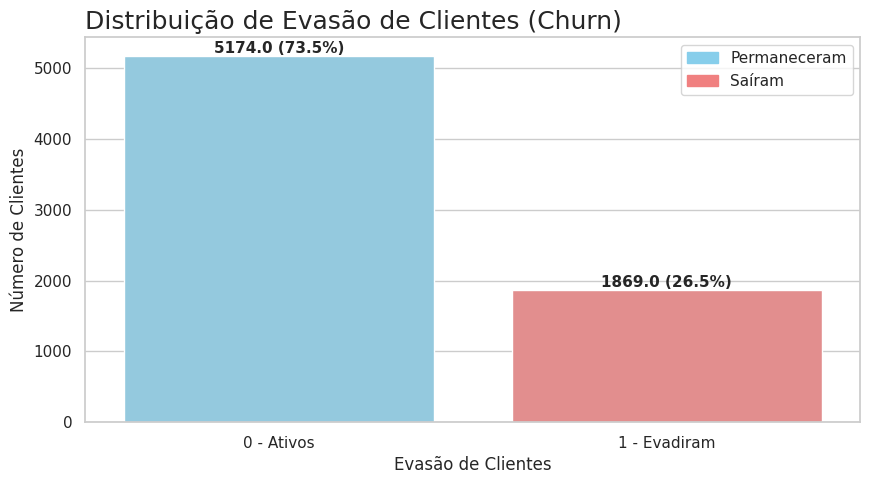

In [141]:
# visualizar a proporção de clientes que permaneceram e os que saíram através de um gráfico

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar avisos
warnings.filterwarnings("ignore")

# Paleta de cores personalizada
paleta_cores = {
    '0': 'skyblue',
    '1': 'lightcoral',
}

# Estilo do gráfico
sns.set_theme(style="whitegrid")

# Criar gráfico
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=dados_encoded['Churn'], data=dados_encoded, palette=paleta_cores)

# Título e eixos
plt.title('Distribuição de Evasão de Clientes (Churn)', fontsize=18, loc='left')
plt.ylabel('Número de Clientes')
plt.xlabel('Evasão de Clientes')

# Rótulos legíveis no eixo X
label_map = {'0': '0 - Ativos', '1': '1 - Evadiram'}
xtick_labels = [label_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(xtick_labels)

# Adicionar total e percentual nas barras
total = len(dados_encoded)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    label = f'{count} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
handles = [plt.Rectangle((0,0),1,1, color=paleta_cores[key]) for key in paleta_cores]
labels = ['Permaneceram', 'Saíram']
plt.legend(handles, labels, loc='upper right')

plt.show()

# Análise de Correlação

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# visualizar as colunas
dados_encoded.columns

Index(['Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'account_PaperlessBilling', 'account_Charges_Monthly',
       'account_Charges_Total', 'Contas_Diarias', 'customer_gender_Male',
       'phone_MultipleLines_1', 'phone_MultipleLines_No phone service',
       'internet_InternetService_DSL', 'internet_InternetService_Fiber optic',
       'internet_OnlineSecurity_1',
       'internet_OnlineSecurity_No internet service',
       'internet_OnlineBackup_1', 'internet_OnlineBackup_No internet service',
       'internet_DeviceProtection_1',
       'internet_DeviceProtection_No internet service',
       'internet_TechSupport_1', 'internet_TechSupport_No internet service',
       'internet_StreamingTV_1', 'internet_StreamingTV_No internet service',
       'internet_StreamingMovies_1',
       'internet_StreamingMovies_No internet service',
       'account_Contract_One year', 'account_Contract_Two year',
      

In [144]:
# verificar a correlação entre as features 'No internet service' (redundantes)
dados_encoded[['internet_OnlineSecurity_No internet service',
             'internet_OnlineBackup_No internet service',
             'internet_DeviceProtection_No internet service',
             'internet_TechSupport_No internet service',
             'internet_StreamingTV_No internet service',
             'internet_StreamingMovies_No internet service']].corr()

,internet_OnlineSecurity_No internet service,internet_OnlineBackup_No internet service,internet_DeviceProtection_No internet service,internet_TechSupport_No internet service,internet_StreamingTV_No internet service,internet_StreamingMovies_No internet service
internet_OnlineSecurity_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet_OnlineBackup_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet_DeviceProtection_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet_TechSupport_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet_StreamingTV_No internet service,1.0,1.0,1.0,1.0,1.0,1.0
internet_StreamingMovies_No internet service,1.0,1.0,1.0,1.0,1.0,1.0


Uma **correlação de 1.0** indica uma **correlação perfeita** e **positiva**. Isso significa que as colunas são perfeitamente redundantes. Se o valor em uma coluna é 1, o valor correspondente em todas as outras colunas também é 1.

**Contexto dos dados:**

Se um cliente não possui serviço de internet (**No internet service**), ele, por lógica, também não terá nenhum dos serviços adicionais que dependem da internet, como 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV' e 'Streaming Movies'. Portanto, as informações nessas colunas são idênticas para o mesmo cliente, resultando na correlação perfeita.

✅ **Ação:**

Criar a coluna 'Tem_internet',  derivada dessas colunas para evitar problemas como a multicolinearidade, que pode afetar a estabilidade e a interpretabilidade de alguns modelos.
Neste caso, basta inverter os valores de uma das colunas originais.

In [145]:
# Criar a coluna 'Tem_internet'
dados_encoded['Tem_Internet'] = 1 - dados_encoded['internet_OnlineSecurity_No internet service']

In [146]:
# remover as colunas 'No internet service' (evitar redundância)
dados_encoded = dados_encoded.drop([
    'internet_OnlineSecurity_No internet service',
    'internet_OnlineBackup_No internet service',
    'internet_DeviceProtection_No internet service',
    'internet_TechSupport_No internet service',
    'internet_StreamingTV_No internet service',
    'internet_StreamingMovies_No internet service'], axis=1)

In [147]:
# visualizar as informações após tratamento das features
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer_SeniorCitizen                         7043 non-null   int64  
 2   customer_Partner                               7043 non-null   int64  
 3   customer_Dependents                            7043 non-null   int64  
 4   customer_tenure                                7043 non-null   int64  
 5   phone_PhoneService                             7043 non-null   int64  
 6   account_PaperlessBilling                       7043 non-null   int64  
 7   account_Charges_Monthly                        7043 non-null   float64
 8   account_Charges_Total                          7043 non-null   float64
 9   Contas_Diarias                                 7043 

# Correlação e seleção de variáveis

In [148]:
# Aplicar correlação
dados_corr = dados_encoded.corr()

# Gerar o mapa de calor da correlação

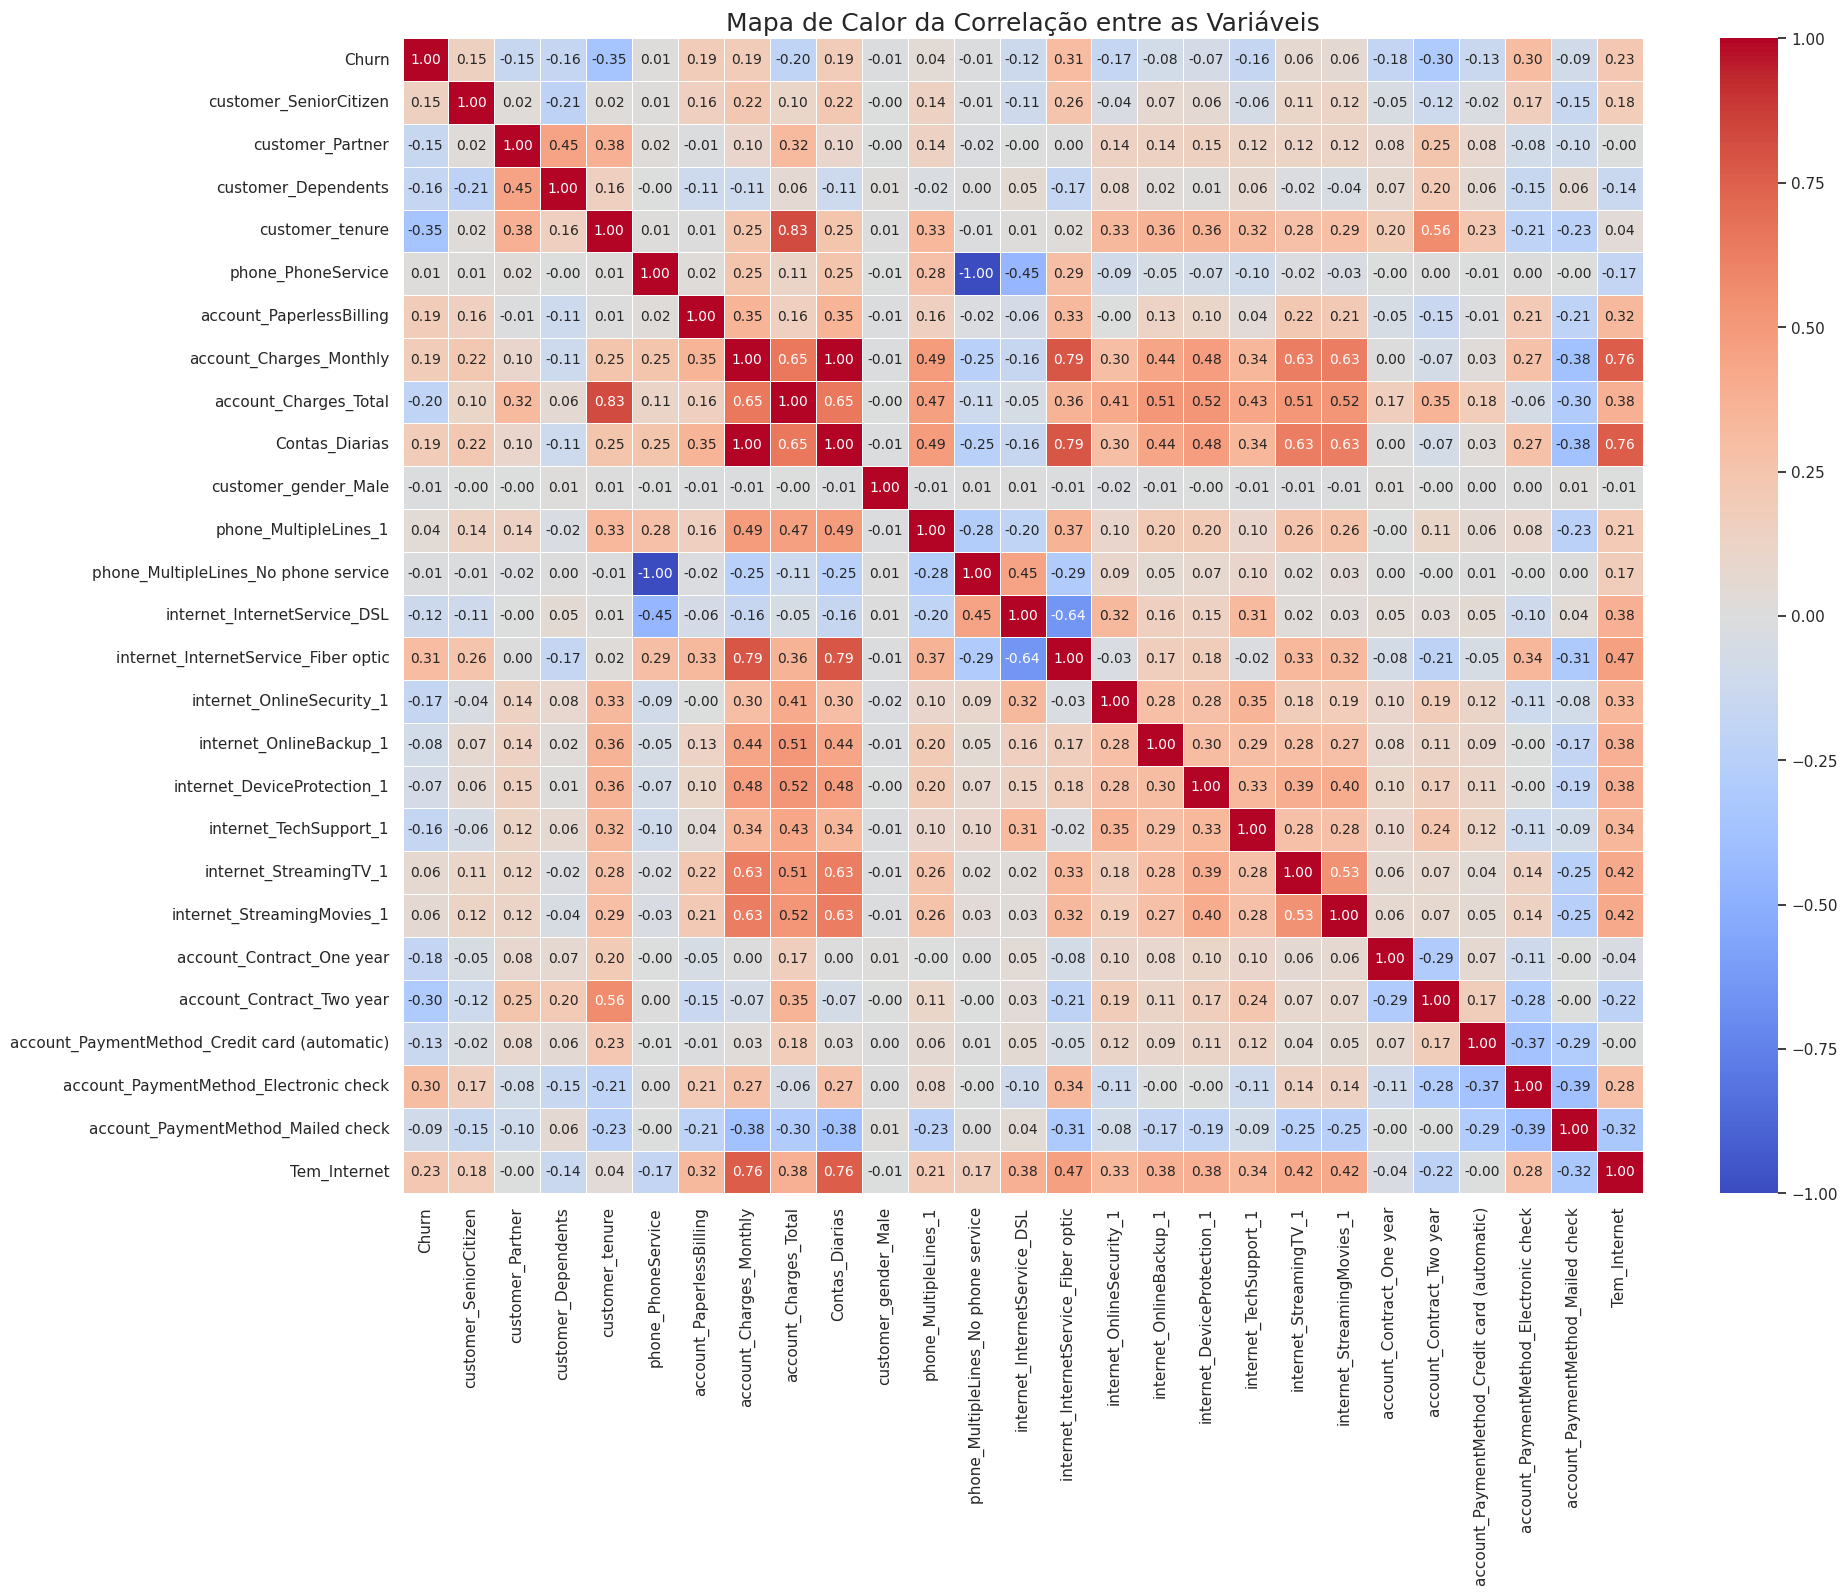

In [149]:
# Gerar o mapa de calor da correlação (heatmap)

plt.figure(figsize=(20, 15))
sns.heatmap(dados_corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5,
            annot_kws={"size": 10}
)
plt.title('Mapa de Calor da Correlação entre as Variáveis', fontsize=18)

# Exibir o mapa de calor (heatmap)
plt.show()

# Mapa de calor das variáveis com correlação >= 0.2 com 'Churn'

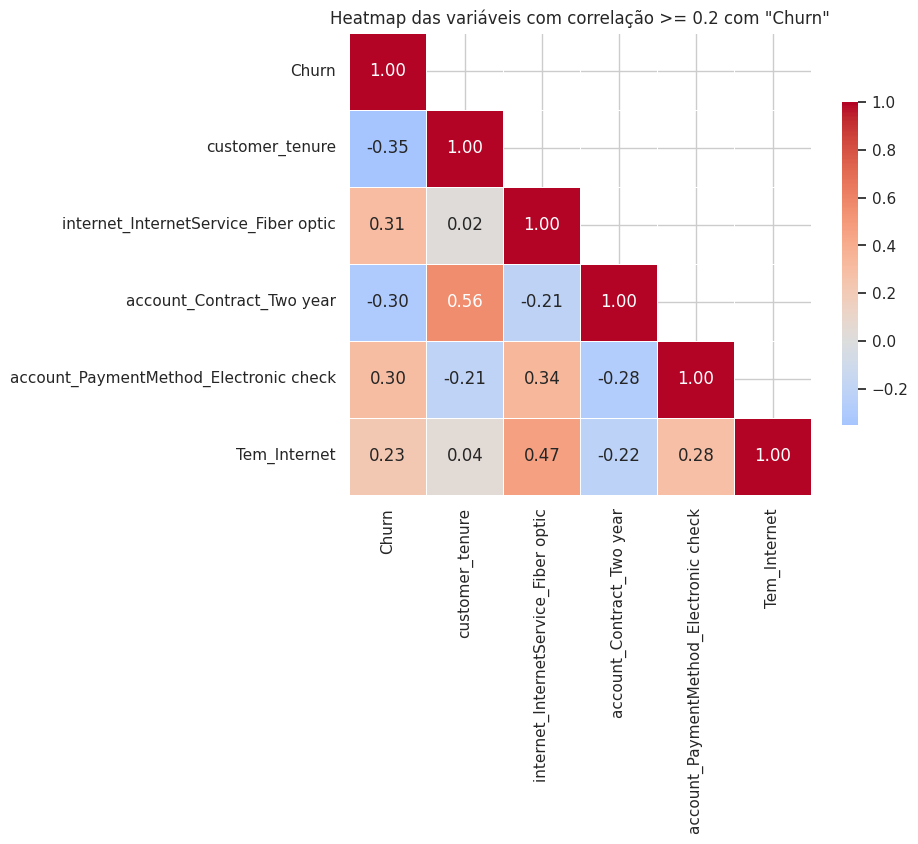

In [150]:
import numpy as np

# Definir a variável alvo
target_var = 'Churn'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = dados_corr.index[abs(dados_corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = dados_corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool), k=1)

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

# Verificar a multicolinearidade

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecionar as variáveis independentes
X = dados_encoded.drop(columns=['Churn'])

# Adicionar constante (intercepto)
X_const = add_constant(X)

**Calcular o VIF**

In [152]:
# Converter as colunas para float
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Arredondar os valores para 2 casas decimais
vif_data["VIF"] = vif_data["VIF"].round(2)

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
5,phone_PhoneService,inf
13,internet_InternetService_DSL,inf
12,phone_MultipleLines_No phone service,inf
26,Tem_Internet,inf
14,internet_InternetService_Fiber optic,inf
7,account_Charges_Monthly,116257.52
9,Contas_Diarias,115170.54
20,internet_StreamingMovies_1,24.12
19,internet_StreamingTV_1,24.06
8,account_Charges_Total,10.79


**Calcula o VIF para cada coluna**

variance_inflation_factor(X_const.values, i) mede quanto a variância do coeficiente de uma variável aumenta devido à correlação com outras variáveis.

**Valores:**

**VIF = 1** → Sem correlação com as outras.

**VIF entre 1 e 5** → Correlação moderada.

**VIF > 10** → Forte multicolinearidade (problema sério).

**VIF = inf** → Correlação perfeita com outra(s) variável(eis).

In [153]:
# analisar correlação de gastos
X_const[['account_Charges_Monthly',
             'account_Charges_Total',
             'Contas_Diarias']].corr()

,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
account_Charges_Monthly,1.000000,0.651174,0.999996
account_Charges_Total,0.651174,1.000000,0.651208
Contas_Diarias,0.999996,0.651208,1.000000


A correlação entre account_Charges_Monthly e Contas_Diarias é quase perfeita (0.999996), o que indica multicolinearidade severa: elas carregam a mesma informação.

Ambas têm uma correlação moderada com account_Charges_Total.

In [154]:
# analisar correlação de internet
X_const[['Tem_Internet', 'internet_InternetService_Fiber optic', 'internet_InternetService_DSL']].corr()

,Tem_Internet,internet_InternetService_Fiber optic,internet_InternetService_DSL
Tem_Internet,1.000000,0.465793,0.380635
internet_InternetService_Fiber optic,0.465793,1.000000,-0.640987
internet_InternetService_DSL,0.380635,-0.640987,1.000000


O modelo se beneficia mais ao saber qual tipo de internet (DSL ou Fibra) do que simplesmente se o cliente tem ou não internet.

Ao usar get_dummies(..., drop_first=True), a ausência das duas (DSL=0 e Fiber=0) já representa “sem internet”.

✅ **Ação**

Remover a coluna **Tem_Internet**, pois:

Ela é redundante (derivada dessas duas).

Tem menor poder explicativo (só diz se tem internet ou não).

Causa multicolinearidade.

In [155]:
# analisar correlação de serviço de telefone
X_const[['phone_PhoneService', 'phone_MultipleLines_No phone service', 'phone_MultipleLines_1']].corr()

,phone_PhoneService,phone_MultipleLines_No phone service,phone_MultipleLines_1
phone_PhoneService,1.00000,-1.00000,0.27969
phone_MultipleLines_No phone service,-1.00000,1.00000,-0.27969
phone_MultipleLines_1,0.27969,-0.27969,1.00000


phone_PhoneService é **0** ou **1**: indica se o cliente tem ou não telefone.

phone_MultipleLines_No phone service é **1** se o cliente não tem telefone.

phone_MultipleLines_1 é 1 se o cliente tem múltiplas linhas (e provavelmente **0** caso contrário).

Ou seja, phone_PhoneService e phone_MultipleLines_No phone service são perfeitamente colineares (correlação de **-1**), ou seja, uma é o exato inverso da outra.


✅ **Ação**

Manter a coluna **phone_MultipleLines_1**, pois:

É a mais informativa das três (indica o tipo de serviço).

Pode ser 0 (linha única), 1 (múltiplas linhas), e indiretamente informa se o cliente tem ou não telefone (pelo valor ausente).

**VIF refeita**

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Copiar X original para não modificar o original
X_filtered = X_const.copy()

# Remover variáveis com multicolinearidade perfeita (VIF = inf)
cols_to_drop = [
    'phone_PhoneService',                     # Altamente colinear com "MultipleLines"
  	'phone_MultipleLines_No phone service',   # Redundante com ausência de telefone
  	'Tem_Internet',                           # Altamente colinear com "internet_InternetService_DSL e Fiber optic"
  	'internet_InternetService_DSL'            # Altamente colinear com "internet_InternetService_Fiber optic"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# Remover redundâncias fortes entre variáveis numéricas
# Se 'Contas_Diarias' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', manter só um
X_filtered.drop(columns=["Contas_Diarias"], inplace=True)

# Garantir que os dados estão em float para o VIF funcionar
X_filtered = X_filtered.astype(float)

# Recalcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.456954
6,account_Charges_Monthly,18.159094
7,account_Charges_Total,10.687811
4,customer_tenure,7.492501
10,internet_InternetService_Fiber optic,6.997677
18,account_Contract_Two year,2.512990
16,internet_StreamingMovies_1,2.189029
15,internet_StreamingTV_1,2.187416
20,account_PaymentMethod_Electronic check,1.967547
21,account_PaymentMethod_Mailed check,1.850909


Constante (**const**) com **VIF alto** (36,45)

Não é problema, pois a **const** não é uma variável preditora de interesse — é só o intercepto da regressão.

Pode ser ignorada na análise de multicolinearidade.
<br>
<br>

**Limite clássico de atenção (VIF > 10)**

**account_Charges_Monthly** →	18.16

**account_Charges_Total**   → 10.69

Valor acima de 10 indica alta correlação com alguma outra variável (provavelmente customer_tenure).

<br>


**Interpretação**

**Monthly** → comportamento atual do cliente (valor mensal gasto).

**Total** → histórico completo (depende do tempo de permanência).

Geralmente, **Monthly** é mais útil para entender o presente, enquanto **Total** pode ser enviesado por clientes antigos.

A fim de deixar o modelo mais "limpo", será removida a coluna **'account_Charges_Total'** .

**VIF Final**

In [157]:
# Remover a variável account_Charges_Total
X_final = X_filtered.drop(columns=['account_Charges_Total'])

# Recalcular o VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Exibir os resultados ordenados
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.594502
6,account_Charges_Monthly,17.284744
9,internet_InternetService_Fiber optic,6.934263
4,customer_tenure,2.783636
17,account_Contract_Two year,2.502672
14,internet_StreamingTV_1,2.165570
15,internet_StreamingMovies_1,2.164623
19,account_PaymentMethod_Electronic check,1.964292
20,account_PaymentMethod_Mailed check,1.828498
13,internet_TechSupport_1,1.712057


# **Análises Direcionadas**

### Total Gasto x Evasão






In [158]:
import plotly.express as px
import plotly.graph_objects as go

# Criar o gráfico usando 'Churn' como eixo X
fig = px.box(
    dados_encoded,
    x='Churn',
    y='account_Charges_Total',
    color='Churn',
    color_discrete_map={0: 'skyblue', 1: 'lightcoral'}
)

# Calcular e adicionar a mediana para cada grupo (0 e 1)
for valor in [0, 1]:
    mediana = dados_encoded[dados_encoded['Churn'] == valor]['account_Charges_Total'].median()
    fig.add_trace(go.Scatter(
        x=[valor],
        y=[mediana],
        mode='markers+text',
        marker=dict(color='black', size=10, symbol='diamond'),
        text=[f'Mediana: {mediana:.2f}'],
        textposition='top center',
        showlegend=False
    ))

# Atualizar layout com rótulos personalizados no eixo X
fig.update_layout(
    title='Distribuição do Total Gasto por Clientes (account_Charges_Total) x Evasão (Churn)',
    xaxis_title='Status do Cliente',
    yaxis_title='Total Gasto (R$)',
    legend_title='Churn',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Ativo', 'Evadiu']
    )
)

# Exibir
fig.show()


### Tempo de Contrato x Evasão

In [159]:
import plotly.express as px
import plotly.graph_objects as go

# Criar o gráfico usando 'Churn' como eixo X
fig = px.box(
    dados_encoded,
    x='Churn',
    y='customer_tenure',
    color='Churn',
    color_discrete_map={0: 'skyblue', 1: 'lightcoral'}
)

# Calcular e adicionar a mediana para cada grupo (0 e 1)
for valor in [0, 1]:
    mediana = dados_encoded[dados_encoded['Churn'] == valor]['customer_tenure'].median()
    fig.add_trace(go.Scatter(
        x=[valor],
        y=[mediana],
        mode='markers+text',
        marker=dict(color='black', size=10, symbol='diamond'),
        text=[f'Mediana: {mediana:.2f}'],
        textposition='top center',
        showlegend=False
    ))

# Atualizar layout com rótulos personalizados no eixo X
fig.update_layout(
    title='Distribuição do Tempo de Contrato (Tenure) x Evasão (Churn)',
    xaxis_title='Status do Cliente',
    yaxis_title='Tempo de Contrato (meses)',
    legend_title='Situação',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Ativo', 'Evadiu']
    )
)

# Exibir
fig.show()

# Modelagem Preditiva

### Separando os dados

In [160]:
from sklearn.model_selection import train_test_split

# Dividir os dados (treino e teste)
X = X_final.drop(columns=['const'], axis=1)  # remover a coluna 'const' pois foi criada apenas para o cálculo do VIF
y = dados_encoded['Churn']

# Salvar os nomes das colunas antes de escalonar e normalizar
nomes_colunas = X.columns

# Dividir dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

# Exibe as dimensões dos conjuntos de treino e teste
print(f"Dimensões do conjunto de treino: {X_treino.shape}, {y_treino.shape}")
print(f"Dimensões do conjunto de teste: {X_teste.shape}, {y_teste.shape}")

Dimensões do conjunto de treino: (4930, 20), (4930,)
Dimensões do conjunto de teste: (2113, 20), (2113,)


### Criação de Modelos
A maioria dos **modelos de machine learning**, possui **hiperparâmetros** que precisam ser ajustados para obter o **melhor desempenho**. O **GridSearchCV** automatiza esse processo, **testando sistematicamente diferentes combinações de hiperparâmetros** que foram definidos.

Usarei o GridSearchCV para **ajuda a encontrar a melhor configuração de hiperparâmetros para o modelo** de **forma automática** e **sistemática**.

In [161]:
# Importar as bibliotecas

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, roc_curve, precision_recall_curve, auc
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Logistic Regression com GridSearchCV

In [162]:
# Escalonar os dados
scaler = StandardScaler()
X_treino_escalonado = scaler.fit_transform(X_treino)
X_teste_escalonado = scaler.transform(X_teste)

# Balancear os dados
oversample = SMOTE(random_state=42)
X_treino_balanceado, y_balanceado = oversample.fit_resample(X_treino_escalonado, y_treino)

# Definir grade de hiperparâmetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Configurar GridSearchCV
modelo = GridSearchCV(
    LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Treinar o modelo
modelo.fit(X_treino_balanceado, y_balanceado)

# Exibir melhor conjunto encontrado
print("\nMelhores parâmetros encontrados:", modelo.best_params_)
print("Melhor score AUC-ROC no treino balanceado:", modelo.best_score_)

# Definir o melhor modelo
best_model = modelo.best_estimator_

# Avaliar as previsões
y_pred = best_model.predict(X_teste_escalonado)
y_proba = best_model.predict_proba(X_teste_escalonado)[:, 1]

# Exibir as métricas
print(f'\nAcurácia: {accuracy_score(y_teste, y_pred) * 100:.2f}%')
print(f'AUC-ROC Score: {roc_auc_score(y_teste, y_proba) * 100:.2f}%')

print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores parâmetros encontrados: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score AUC-ROC no treino balanceado: 0.8562870570453303

Acurácia: 75.15%
AUC-ROC Score: 83.36%

Matriz de Confusão:
[[1149  403]
 [ 122  439]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1552
           1       0.52      0.78      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



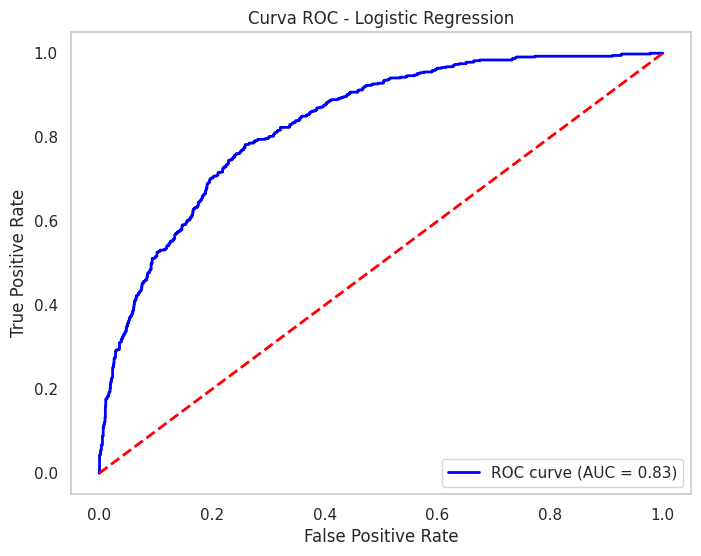

In [163]:
# Plotar o gráfico de curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_proba)
roc_auc = roc_auc_score(y_teste, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

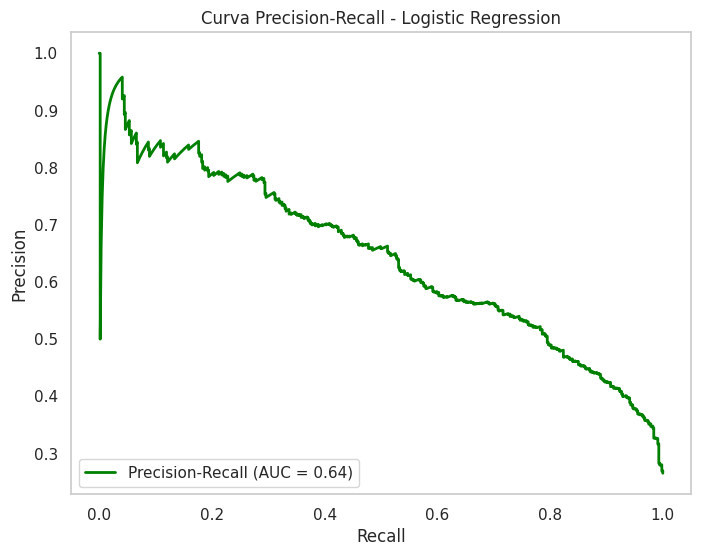

In [164]:
# Plotar o gráfico Precision-Recall
precision, recall, pr_thresholds = precision_recall_curve(y_teste, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Logistic Regression')
plt.legend(loc='lower left')
plt.grid()
plt.show()

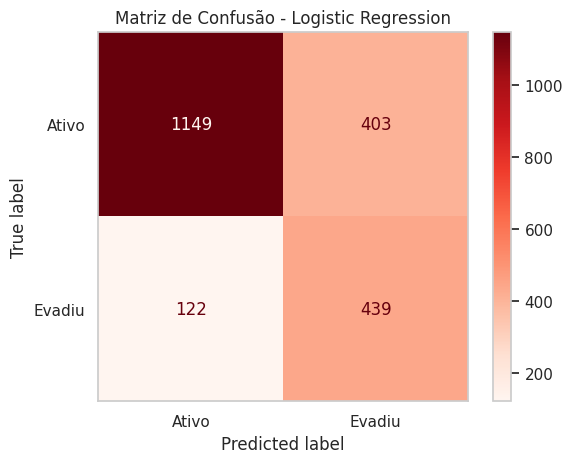

In [165]:
# Gerar matriz de confusão de LogisticRegression
cm = confusion_matrix(y_teste, y_pred)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadiu'])
ax = disp.plot(cmap='Reds')
ax.ax_.grid(False)
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

### Análise de Importância das Variáveis

                                         Variável  Coeficiente
3                                 customer_tenure    -0.925616
16                      account_Contract_Two year    -0.664830
15                      account_Contract_One year    -0.312663
12                         internet_TechSupport_1    -0.183746
9                       internet_OnlineSecurity_1    -0.131374
2                             customer_Dependents    -0.104066
1                                customer_Partner    -0.043336
10                        internet_OnlineBackup_1    -0.037483
6                            customer_gender_Male    -0.006246
19             account_PaymentMethod_Mailed check     0.000000
17  account_PaymentMethod_Credit card (automatic)     0.005712
11                    internet_DeviceProtection_1     0.024863
7                           phone_MultipleLines_1     0.082882
0                          customer_SeniorCitizen     0.083991
13                         internet_StreamingTV_1     0

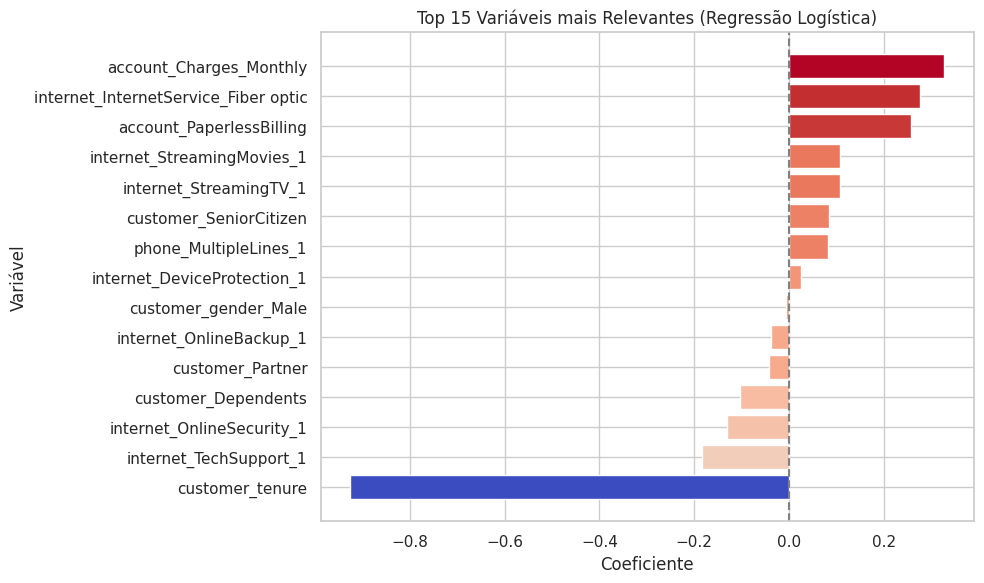

In [166]:
# Coeficientes do modelo
coeficientes = best_model.coef_[0]

# Montar DataFrame com nome e valor
importancia_variaveis = pd.DataFrame({
    'Variável': X_treino.columns,  # nomes originais
    'Coeficiente': coeficientes
})
print(importancia_variaveis.sort_values(by='Coeficiente', ascending=True))
print()

# Selecionar as top 15 variáveis (já ordenadas pelo coeficiente)
top_vars = importancia_variaveis.head(15).sort_values(by='Coeficiente', ascending=True)

# Normalizar os valores para mapear ao degradê
norm = plt.Normalize(top_vars['Coeficiente'].min(), top_vars['Coeficiente'].max())

# Definir cor das barras
colors = plt.cm.coolwarm(norm(top_vars['Coeficiente']))

# Exibir gráfico
plt.figure(figsize=(10,6))
plt.barh(top_vars['Variável'], top_vars['Coeficiente'], color=colors)
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 15 Variáveis mais Relevantes (Regressão Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

A Regressão Logística permite identificar a influência de cada variável independente sobre a probabilidade de evasão (Churn).
Isso é feito por meio da análise dos coeficientes (coef_) do modelo.

Cada coeficiente indica a **influência** de uma variável na previsão da evasão.

- **Positivo** → aumenta a probabilidade de evasão (churn).

- **Negativo** → reduz a probabilidade de evasão (retenção).

Magnitude (valor absoluto) → indica **força da influência**.

<br>

✅ **Conclusão**

A análise dos coeficientes da Regressão Logística mostra que fatores contratuais, como o tipo e duração do contrato, e características do serviço de internet têm forte influência na evasão. Variáveis como tempo de permanência (tenure) aparecem como um fator protetivo, ou seja, clientes mais antigos têm menor probabilidade de deixar a empresa.

Essa interpretação é valiosa para as áreas de negócios e marketing, pois orienta estratégias para retenção com base em perfis de maior risco.

###**Justificativa da Escolha do Modelo: Logistic Regression**

A Regressão Logística foi escolhida como um dos modelos base para prever a evasão de clientes (churn) por ser uma técnica estatística simples, eficiente e interpretável, especialmente útil em problemas de classificação binária — como “evadiu” ou “permaneceu”.
<br>

- **Interpretação fácil e direta**


- **Ideal para problemas binários**


- **Bom desempenho com poucos recursos computacionais**


- **Funciona bem quando as variáveis foram normalizadas**

<br>

✅ **Conclusão**:

A Regressão Logística é uma excelente escolha por ser simples, rápida, interpretável e eficaz em problemas de classificação binária como a evasão de clientes. Mesmo não sendo o modelo mais complexo, sua aplicação é essencial para entender o comportamento dos dados e comparar com outras abordagens, garantindo um processo de modelagem completo e confiável.

### Random Forest com GridSearchCV

In [167]:
# Dividir os dados (treino e teste)
X_treino_rf, X_teste_rf, y_treino_rf, y_teste_rf = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalonar os dados
scaler = StandardScaler()
X_treino_rf_escalonado = scaler.fit_transform(X_treino_rf)
X_teste_rf_escalonado = scaler.transform(X_teste_rf)

# Aplicar balanceamento
smote = SMOTE(random_state=42)
X_treino_rf_balanceado, y_rf_balanceado = smote.fit_resample(X_treino_rf_escalonado, y_treino_rf)

# Definir grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12, 16],        # restringindo para evitar overfitting
    'min_samples_split': [3, 5, 7],  # aumenta o mínimo de amostras p/ dividir
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']     # força ajuste de pesos para recall
}

# Criar modelo base
modelo_rf = RandomForestClassifier(random_state=42, n_jobs=1)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_rf,
    param_grid=param_grid,
    scoring='f1',   # otimiza F1-score
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Treinar o modelo
grid_search.fit(X_treino_rf_balanceado, y_rf_balanceado)

# Exibir o melhor conjunto encontrado
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score AUC-ROC no treino balanceado:", grid_search.best_score_)

# Melhor modelo
best_model_rf = grid_search.best_estimator_

# Avaliar as previsões
y_pred_rf = best_model_rf.predict(X_teste_rf_escalonado)
y_proba_rf = best_model_rf.predict_proba(X_teste_rf_escalonado)[:, 1]

# Exibir as métricas
print(f'\nAcurácia: {accuracy_score(y_teste_rf, y_pred_rf) * 100:.2f}%')
print(f'AUC-ROC Score: {roc_auc_score(y_teste_rf, y_proba_rf) * 100:.2f}%')

print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste_rf, y_pred_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_teste_rf, y_pred_rf))

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Melhores parâmetros encontrados: {'class_weight': 'balanced', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Melhor score AUC-ROC no treino balanceado: 0.8550839001153735

Acurácia: 77.33%
AUC-ROC Score: 82.19%

Matriz de Confusão:
[[1283  269]
 [ 210  351]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1552
           1       0.57      0.63      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



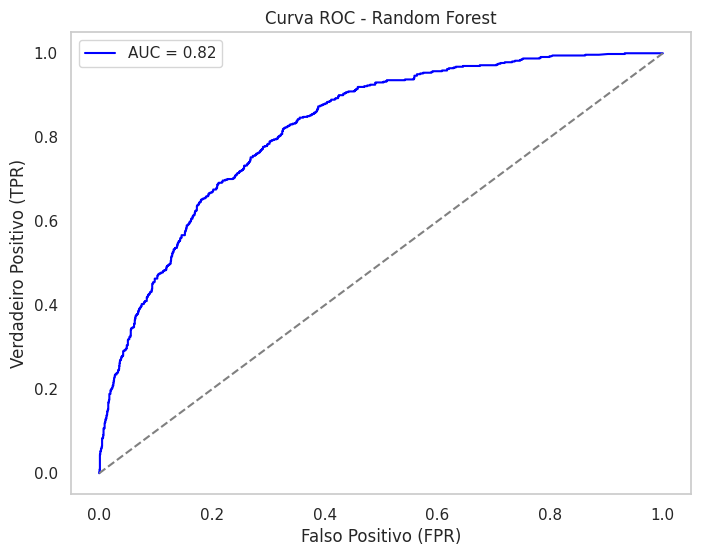

In [168]:
# Plotar gráfico de curva ROC =====
fpr, tpr, _ = roc_curve(y_teste_rf, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc_score(y_teste_rf, y_proba_rf):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()

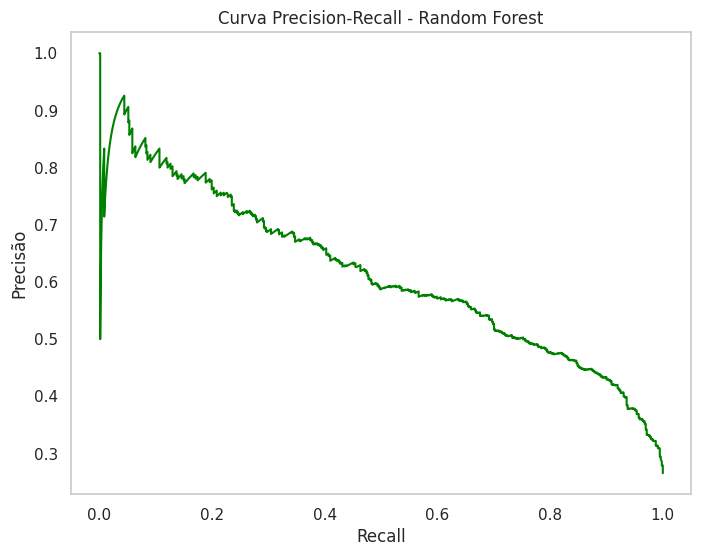

In [169]:
# Plotar gráfico de curva Precision-Recall =====
prec, rec, _ = precision_recall_curve(y_teste_rf, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(rec, prec, color='green')
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.grid()
plt.show()

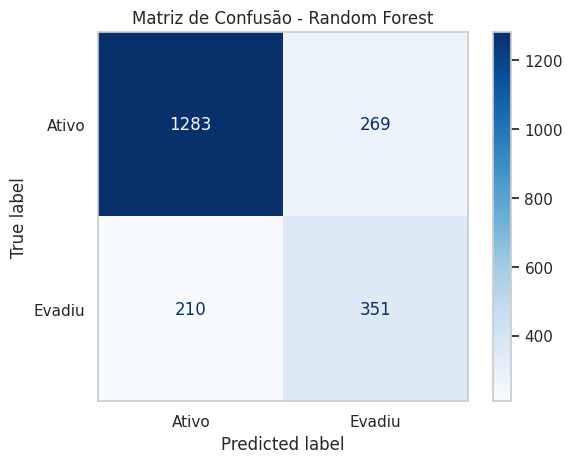

In [170]:
# Gerar matriz de confusão de Randon Forest
cm = confusion_matrix(y_teste_rf, y_pred_rf)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadiu'])
ax = disp.plot(cmap='Blues')
ax.ax_.grid(False)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

### Análise de Importância das Variáveis


Top 15 variáveis mais relevantes:
                                  Variável  Importância
3                          customer_tenure     0.214566
5                  account_Charges_Monthly     0.152709
16               account_Contract_Two year     0.091369
8     internet_InternetService_Fiber optic     0.069259
15               account_Contract_One year     0.054889
18  account_PaymentMethod_Electronic check     0.050647
4                 account_PaperlessBilling     0.046353
12                  internet_TechSupport_1     0.038274
9                internet_OnlineSecurity_1     0.033475
1                         customer_Partner     0.033141
6                     customer_gender_Male     0.029710
10                 internet_OnlineBackup_1     0.026792
7                    phone_MultipleLines_1     0.026072
2                      customer_Dependents     0.025096
14              internet_StreamingMovies_1     0.020979



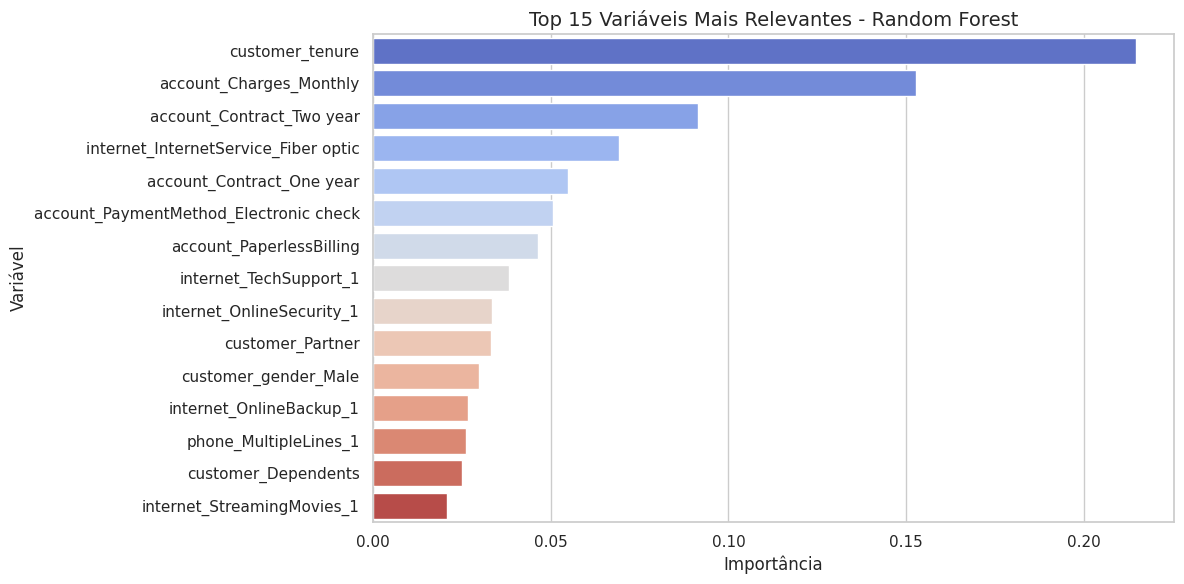

In [171]:
# Obter importâncias do melhor modelo
importancias = best_model_rf.feature_importances_

# Criar DataFrame ordenado por importância
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

print("\nTop 15 variáveis mais relevantes:")
print(importancia_df.head(15))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=importancia_df.head(15),
    palette='coolwarm'
)
print()
plt.title('Top 15 Variáveis Mais Relevantes - Random Forest', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


As variáveis no topo do gráfico são as que mais impactam a decisão do modelo.

Pode ser útil para:

Reduzir dimensionalidade (remover variáveis pouco importantes);

Fazer explicações interpretáveis do modelo;

Refinar novos modelos com foco nas variáveis mais relevantes.
<br><br>

✅ **Conclusão:**

A análise de importância das variáveis no modelo Random Forest ajuda a compreender o que mais pesa na decisão do cliente evadir.
Essas variáveis mais relevantes são bons candidatos para:

Campanhas de retenção direcionadas

Segmentação de risco

Refinamento de modelos futuros
<br>


###**Justificativa da Escolha do Modelo: Random Forest**

O modelo Random Forest foi escolhido por ser uma técnica robusta, precisa e versátil para tarefas de classificação binária, como o problema de prever a evasão de clientes (churn).
<br>

- **Alta performance preditiva**

- **Lida bem com dados mistos**

- **Resistente a outliers e valores extremos**

- **Importância das variáveis**

- **Controle da complexidade**

<br>

✅ **Conclusão**:

A escolha do Random Forest se justifica pela eficácia em lidar com problemas reais de classificação, como o churn, por sua capacidade de generalização, boa explicabilidade e por não exigir normalização dos dados. A etapa de escolha e avaliação do modelo é fundamental para garantir que a solução seja precisa, interpretável e confiável para apoiar a tomada de decisão.

# Avaliando os Modelos

In [172]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Logistic Regressions
metricas_lr = {
    'Acurácia': accuracy_score(y_teste, y_pred),
    'Precisão': precision_score(y_teste, y_pred),
    'Recall': recall_score(y_teste, y_pred),
    'F1-Score': f1_score(y_teste, y_pred),
    'AUC': roc_auc_score(y_teste, y_proba)
}

# Random Forest Métricas
metricas_rf = {
    'Acurácia': accuracy_score(y_teste_rf, y_pred_rf),
    'Precisão': precision_score(y_teste_rf, y_pred_rf),
    'Recall': recall_score(y_teste_rf, y_pred_rf),
    'F1-Score': f1_score(y_teste_rf, y_pred_rf),
    'AUC': roc_auc_score(y_teste_rf, y_proba_rf)
}

# Criar DataFrame comparativo
df_comparativo = pd.DataFrame([metricas_lr, metricas_rf], index=['Logistic Regression', 'Random Forest'])
print(df_comparativo.round(4))


                     Acurácia  Precisão  Recall  F1-Score     AUC
Logistic Regression    0.7515    0.5214  0.7825    0.6258  0.8336
Random Forest          0.7733    0.5661  0.6257    0.5944  0.8219


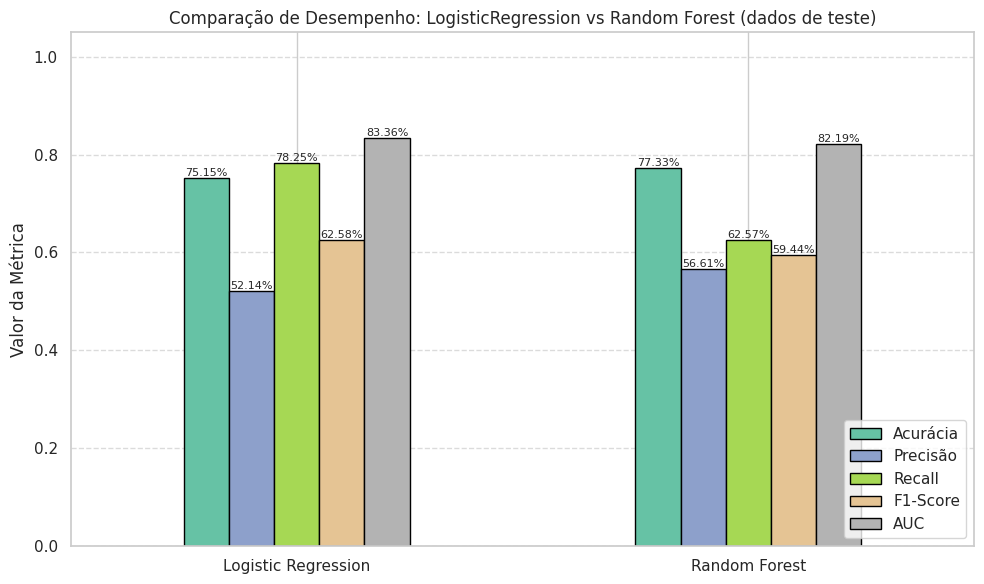

In [173]:
import matplotlib.pyplot as plt

# Plotar o gráfico de barras
ax = df_comparativo.plot(
    kind='bar',
    figsize=(10,6),
    colormap='Set2',
    edgecolor='black'
)

# Título e ajustes visuais
plt.title('Comparação de Desempenho: LogisticRegression vs Random Forest (dados de teste)')
plt.ylabel('Valor da Métrica')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()

# Adicionar os valores percentuais acima das barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura:.2%}',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom', fontsize=8)

# Mostrar o gráfico
plt.show()


### **Avaliação comparativa entre os modelos: Logistic Regression e Random Forest:**

**Comparar os modelos com base nos resultados:**


| Métrica                    | Logistic Regression | Random Forest |
| -------------------------- | ------------------: | ------------: |
| **Acurácia**               |              75,15% |        **77,33%** |
| **Precisão**               |              52,14% |        **56,61%** |
| **Recall (Sensibilidade)** |              **78,25%** |        62,57% |
| **F1-Score**               |              **62,58%** |        59,44% |
| **AUC-ROC**                |              **83,36%** |        82,19% |

<br>

**Acurácia**

Representa a proporção de previsões corretas em relação ao total de casos.

**Random Forest** tem acurácia ligeiramente maior (**77,33% vs 75,15%**), indicando que, de forma geral, prevê mais corretamente tanto positivos quanto negativos.
<br><br>
**Precisão** (Precision)

Mede a proporção de previsões positivas corretas em relação a todas as previsões positivas.

**Random Forest** apresenta precisão superior (**56,61% vs 52,14%**), sendo mais confiável quando indica que um evento ocorrerá.
<br><br>
**Recall** (Sensibilidade)

Mede a proporção de eventos positivos corretamente identificados pelo modelo.

**Logistic Regression** se destaca (**78,25% vs 62,57%**), capturando mais casos reais de interesse, o que é crucial se a prioridade for não perder eventos importantes.
<br><br>
**F1-Score**

Combina precisão e recall em uma métrica única, oferecendo uma visão equilibrada do desempenho do modelo em relação à classe positiva.

**Logistic Regression** apresenta F1-Score ligeiramente melhor (**62,58% vs 59,44%**), indicando bom equilíbrio entre identificar positivos e evitar falsos positivos.
<br><br>
**AUC-ROC** (Área sob a curva ROC)

Mede a capacidade do modelo de diferenciar entre classes. Valores mais altos indicam melhor separação entre positivos e negativos.

**Logistic Regression** tem AUC superior (**83,36% vs 82,19%**), sugerindo maior habilidade em discriminar corretamente entre clientes que cancelarão e os que não cancelarão.

<br>


✅ **Conclusão**

Para **capturar a maioria dos eventos positivos, Logistic Regression** é mais indicado devido ao seu recall, F1-Score e AUC superiores.

Para **maximizar a acurácia geral e reduzir falsos positivos, Random Forest** é competitivo e pode ser útil dependendo do objetivo do negócio.

<br>


**Melhor modelo** para detecção de eventos importantes: **Logistic Regression**

Apesar de o Random Forest ter acurácia e precisão um pouco maiores, a **Logistic Regression** apresenta melhor recall, F1-Score e AUC-ROC, o que **indica que ela consegue identificar de forma mais confiável os casos positivos e tem maior capacidade de discriminar corretamente entre as classes**.

Equilibra bem a capacidade de identificar corretamente os casos positivos, mantendo desempenho consistente nas demais métricas.

### **Análise de Overfitting ou Underfitting**

Com base nas métricas de teste, ambos os modelos apresentam desempenho consistente e equilibrado, sem indícios claros de overfitting ou underfitting. A acurácia variou entre 75% e 77%, e o AUC-ROC ficou acima de 0,82, indicando que os modelos conseguem capturar padrões relevantes nos dados.

- **Overfitting**: Não há sinais de que algum modelo esteja ajustado excessivamente aos dados de treino, pois não há queda significativa de performance nos dados de teste.

- **Underfitting**: Nenhum modelo apresenta desempenho tão baixo que sugira incapacidade de aprender os padrões presentes.

**Resumo comparativo:**

- A **Logistic Regression** apresenta maior recall, capturando melhor os casos positivos, mas com precisão menor.

- A **Random Forest** apresenta precisão um pouco superior, porém com recall mais baixo.

Considerando equilíbrio entre métricas e AUC-ROC, ambos os modelos generalizam bem, mas a escolha pode depender do objetivo: priorizar captura de positivos (recall) ou reduzir falsos positivos (precisão).



________________________________________
________________________________________
________________________________________
<br>

# **Relatório Final de Análise e Previsão de Evasão de Clientes (Churn)**

###**Resumo Executivo**

Este relatório apresenta os resultados de uma análise detalhada e modelagem preditiva para identificar os principais fatores que influenciam a evasão de clientes. O objetivo principal foi não apenas prever quais clientes podem cancelar seus serviços, mas também entender **por que** isso acontece. A análise explorou variáveis de serviço, contrato e pagamentos, culminando na construção e comparação de dois modelos de classificação: **Regressão Logística** e **Random Forest**.

<br>

Ambos os modelos demonstraram boa capacidade preditiva, com o Random Forest apresentando uma **acurácia** e **precisão** ligeiramente superiores, enquanto a Regressão Logística se destacou no **recall**, indicando uma maior capacidade de identificar clientes que realmente evadiram. Com base na análise, foi possível identificar os fatores mais relevantes para a evasão e propor estratégias de retenção direcionadas.

<br>

________________________________________________________________________________
<br>

###**Análise dos Dados e Fatores de Evasão**

A análise inicial do conjunto de dados revelou um desequilíbrio na classe-alvo "Churn", com aproximadamente 26,5% dos clientes evadindo. Esse desequilíbrio foi tratado com a técnica **SMOTE** para garantir que os modelos não fossem enviesados.

<br>

A etapa de **análise de correlação** e a verificação de **multicolinearidade** (com o VIF) foram cruciais para selecionar as variáveis mais relevantes e independentes. Por exemplo, foi identificada a redundância entre variáveis como phone_PhoneService e phone_MultipleLines_No phone service, o que levou à remoção de colunas para simplificar o modelo e melhorar a estabilidade.

<br>
Os fatores que mais influenciam a evasão foram extraídos tanto da análise de correlação quanto da importância de variáveis dos modelos. Abaixo estão os principais destaques:

*   **Tempo de Contrato (customer_tenure)**: A análise demonstrou uma forte
correlação negativa com a evasão. A mediana do tempo de contrato para clientes que evadiram é significativamente menor (9 meses) do que para clientes ativos (38 meses). Isso sugere que **clientes que permanecem por menos tempo têm uma probabilidade muito maior de cancelar**.

*   **Tipo de Contrato (contract_Month-to-month)**: Clientes com contratos mensais (Month-to-month) apresentaram uma forte correlação positiva com a evasão. Isso indica que a flexibilidade de um contrato sem fidelidade aumenta o risco de cancelamento.
*   **Serviços de Internet (internet_InternetService_Fiber optic)**: O serviço de internet por fibra óptica mostrou um impacto notável na evasão. Embora seja um serviço de alta velocidade, a análise aponta que ele está associado a um maior índice de churn. Isso pode ser um indicativo de problemas de qualidade ou custo percebido.
*   **Valores Cobrados (account_Charges_Monthly)**: O valor da cobrança mensal (account_Charges_Monthly) também demonstrou ter uma influência considerável na probabilidade de evasão. Clientes que evadiram tendem a ter um gasto mensal maior.

*   **Serviços Adicionais:** A ausência de serviços adicionais como **suporte técnico (tech_TechSupport)** e **segurança online (internet_OnlineSecurity)** aumenta a probabilidade de evasão. Esses serviços parecem atuar como "ancoragens", contribuindo para a satisfação e retenção do cliente.
<br>
________________________________________
<br>

###**Desempenho dos Modelos de Previsão**

Dois modelos de classificação foram implementados e comparados: **Regressão Logística** e **Random Forest**.

**Comparativo de Métricas**

| Métrica                    | Logistic Regression | Random Forest |
| -------------------------- | ------------------: | ------------: |
| **Acurácia**               |              75,15% |        **77,33%** |
| **Precisão**               |              52,14% |        **56,61%** |
| **Recall (Sensibilidade)** |              **78,25%** |        62,57% |
| **F1-Score**               |              **62,58%** |        59,44% |
| **AUC-ROC**                |              **83,36%** |        82,19% |
<br>

*   **Regressão Logística**: Apresentou o melhor **recall** (78.25%). Isso significa que, entre todos os clientes que realmente evadiriam, o modelo conseguiu identificar 78.25% deles. No contexto de retenção, essa é uma métrica extremamente importante, pois permite que a empresa direcione ações para um número maior de clientes em risco, **reduzindo o número de falsos negativos**.

*   **Random Forest**: Teve um desempenho geral um pouco superior em métricas como **acurácia** (77.33%) e **precisão** (56.61%). O modelo cometeu menos falsos positivos (identificando menos clientes como em risco, quando na verdade não estavam), o que pode ser benéfico para empresas com orçamentos de retenção mais limitados.
<br>

**Conclusão sobre a Escolha do Modelo**

Para o objetivo de **proatividade na retenção de clientes**, a **Regressão Logística** é a escolha mais recomendada devido ao seu **recall superior**. A capacidade de identificar uma maior proporção de clientes que realmente evadirão é o mais importante para uma intervenção eficaz. Embora o **Random Forest** seja um modelo mais robusto e com melhor acurácia geral, o alto recall da Regressão Logística a torna mais valiosa para esta aplicação específica.

<br>

________________________________________
<br>

###**Estratégias de Retenção e Recomendaçõe**s

Com base nos resultados da análise, as seguintes estratégias de retenção são propostas:

**Estratégia 1: Foco em Clientes Novos**
*   **Ação**: Direcionar esforços de retenção para clientes com **menos de 1 ano de contrato**, oferecendo um atendimento diferenciado nos primeiros 6 meses.

*   **Justificativa**: A análise mostrou que clientes que evadem têm uma mediana de tempo de contrato de apenas 9 meses. Oferecer suporte proativo, promoções exclusivas ou um "check-in" trimestral pode aumentar a satisfação e reduzir o churn inicial.

**Estratégia 2: Campanhas de Fidelização de Contratos**

*   **Ação**: Incentivar clientes com **contrato mensal** a migrarem para planos anuais ou bianuais.

*   **Justificativa**: Clientes com contratos de longo prazo têm menor probabilidade de evadir. A empresa pode oferecer descontos no valor mensal ou benefícios exclusivos (como um serviço adicional gratuito) em troca de um compromisso de fidelidade.

**Estratégia 3: Melhoria na Qualidade de Serviços de Internet**
*   **Ação**: Investigar e monitorar a satisfação dos clientes com o serviço de **Internet Fibra Óptica**.

*   **Justificativa**: A associação positiva entre a fibra e a evasão sugere que, apesar da tecnologia, pode haver problemas de qualidade, instabilidade ou atendimento. Uma pesquisa de satisfação direcionada a esses clientes pode revelar pontos de melhoria, como a necessidade de suporte técnico mais rápido e eficaz.

**Estratégia 4: Promoção de Serviços Agregados**

*   **Ação**: Criar pacotes promocionais que incluam serviços como **Suporte Técnico Online** e **Segurança Online** de forma gratuita ou com desconto.

*   **Justificativa**: A análise mostrou que a ausência desses serviços é um fator de risco para a evasão. Ao oferecer esses "benefícios" extras, a empresa aumenta o valor percebido do serviço e cria laços mais fortes com o cliente.
Essas estratégias, baseadas em evidências da análise de dados, podem ser implementadas para mitigar os principais fatores de evasão, permitindo que a empresa atue de forma proativa para reter seus clientes.


<br>

________________________________________
<br>

###✅ **Conclusão**

A análise e a modelagem preditiva foram eficazes em extrair insights valiosos do conjunto de dados de clientes. O modelo de Regressão Logística, com seu alto recall, se mostra como a ferramenta mais adequada para identificar clientes em risco de evasão. As estratégias propostas, focadas em clientes novos, fidelização, qualidade de serviço de internet e serviços adicionais, fornecem um guia prático para ações de retenção que podem impactar diretamente os resultados da empresa.
